In [23]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from ipywidgets import interact, interactive
import ipywidgets as widgets

In [6]:
mnist = fetch_openml('mnist_784')

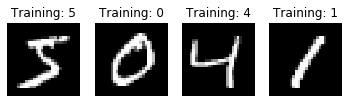

In [24]:
X=mnist.data
y=mnist.target

_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(X, y))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title('Training: %s' % label)

In [25]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=False).fit(X)
print("done in %0.3fs" % (time() - t0))

h=28
w=28
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 70000 faces
done in 4.099s


In [26]:
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_pca = pca.transform(X)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.315s


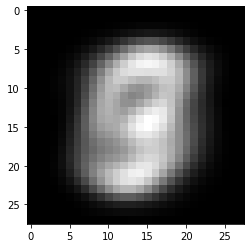

In [27]:
plt.imshow(pca.mean_.reshape(h,w),cmap=plt.cm.gray)

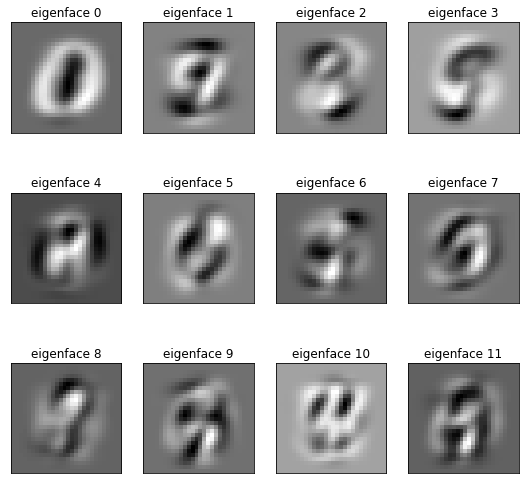

In [28]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [32]:
@interact(c=widgets.IntSlider(min=0,max=10,step=1,value=0,continuous_update=False), 
          f=widgets.FloatSlider(min=-3,max=3,step=0.1,value=0,continuous_update=True))
def eigenmnist(c,f):
    preimage=pca.mean_ + f*np.sqrt(pca.explained_variance_[c])*pca.components_[c]
    plt.imshow(preimage.reshape(28,28),cmap='gray')
    

interactive(children=(IntSlider(value=0, continuous_update=False, description='c', max=10), FloatSlider(value=…